# Deep Learning Notebook



**Author:** Shahrokh Abbasi-Rad

**Date:** 02 November, 2019

**Purpose:** To learn Tensorflow & Keras

**Sources:** 
1. https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=1


**Step 01:**
Install Tensorflow using pip


**Important Note:** Keras is a high-level API that sits on top of Tensorflow
    
API: Application Program Interface


In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

**Step 02:**
Load the data set existed in the keras API
This data set is the dataset of handwritten digits.


There are other types of data there as well. Go to https://keras.io/datasets/

In [13]:
mnist = tf.keras.datasets.mnist   # 28 by 28 mages of handwritten digits

**Step 03:**
Separating this dataset into two categories. Train and Test. 

It seems difficult, but don't panic. It is described in its documentation. By using the function load_data it automatically gives labeled data for train and test separately, as tuples. 


In [15]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
    
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**Interesting Point**

In the cell above I only needed the last line to load the data. It works on other computers but not on mine which is Mac. 

Here python on Mac is trying to have acces to a https:// which is shown above. The problem is that it does not have any certificate to do that maybe because Mac does not give that permission and does not trust it. 
It took me about half an hour to find the solution to that. And the solution was adding those lines above the code. 

**Step 04:**
Try to plot the data to see how do they look like. 

In [7]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[10]

3

این الان نشون داد که داده ی شماره ی ۱۰ تصویر عدد ۳ هست که برات لیبل گذاری هم شده است

ولی خب اینطوری فایده نداره. اون تصویر رو نشونمون بده. که برای این کار باید از یه ماژول به نام مت پلات لیب استفاده کنی

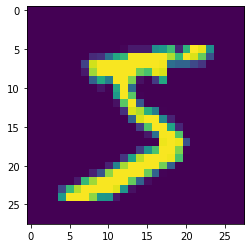

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

که البته تصویرهایی که داره همه سیاه و سفید هستند. شما باید سیاه و سفید می کشیدیش. 

نکته ی جالب دیگه اینه که اون خط سوم رو اگه نمی زدم تصویر رو نشون نمی داد. وااااا. چرا؟

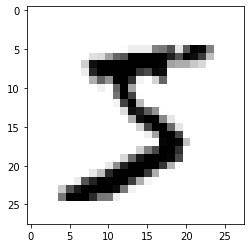

In [13]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

**Step 05:** Normalize the data 

احتمال زیاد به این خاطر داده ها رو نرمالایز میکنه که خب وزن ها همه بین صفر و یک هستند پس بهتره که داده ها هم بین صفر و یک باشند. البته این جا توی این توتوریالی که من گوش میکنم میگه مجبور نیستید این کارو کنید ولی اگه بکنید بهتره

In [16]:
x_train = tf.keras.utils.normalize(x_train, axis=1, order=2)
x_test = tf.keras.utils.normalize(x_test, axis=1, order=2)


**Step 06**
Building the model. 

که اینجا منظور از مدل همون شبکه است دیگه دانشمند. خیلی ساده به مسائل نگاه کن. در واقع این کراس یه سری تابع داره که هزاران خط هستندد و یه شبکه ی عصبی رو می سازند. همون کاری که تو از اسکرچ انجام دادی توی درس با دکتر عرب ولی اینجا میای و با یه خط انجامش میدی

There are two differnt types of model in keras:
1. Sequential
2. Model Class with the functional API

در واقع اون شبکه ای که تو میشناسی همون مدل سیکوئنشیال هست. یعنی یه مشت لایه از نورون ها همینطوری پشت سر هم و تو اینجا هم در خط اول با فراخوانی اون تابع سیکوئنشیال، یه شبکه ی سیکوئنشیال میسازی که خالی خالیه و بعد یکی یکی لایه ها رو بهش اضافه میکنی


**The sequential model is a linear stack of layers.**

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


خب یه توضیح مختصر در مورد مدلی که ساختیم
لایه اول لایه ی اینپوت هست که همه ی  پیکسل ها رو میریزیم توی حالت یه بردار بنابراین لایه ی اول باید فلت باشه

لایه ی دوم و سوم لایه های مخفی هستند که از نوع دنس هستند و براشون باید دو چیز تعریف کنی. یکی تعداد نورون ها و دیگری  نوع اکتیویشن فانکشن که در واقع اگه چطور شد نورون اصطلاحا فایر شود.

لایه ی آخر یا لایه خروجی که خب چون ما اینجا یه کلاسیفایر داریم باید به تعداد کلاس هامون نورون داشته باشیم یعنی ۱۰ تا و لایه ی آخر بر مبنای توابع احتمال بررسی می کنه دیگه. یعنی می گه مثلا این چیزی که به من نشون دادی با توجه به دوران سخت تمرین یا همون ترینینگ که داشتیم، احتمال می دم که عدد سه باشه
بنابراین چون نورون ها بر مبنای احتمال کلاسیفای می شوند، اینجا باید تابع سافت مکس بذاریم


حالا مثلا اینجا می تونه برای تو یه ایستگاه باشه که بری در مورد دو چیز تحقیق کنی. یکی در مورد انواع لایه ها که می تونی بذاری توی مدلت و یکی هم در مورد انواع توابع اکتیویشن

List of all available **Activation Functions** in Keras:
1. elu
2. softmax
3. selu
4. softpuls
5. softsign
6. relu
7. tanh
8. sigmoid
9. hard_sigmoid
10. Exponential
11. Linear

for details check: https://keras.io/activations/


**Step 07:**
Setting parameters for training

In [12]:
model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metric=['accuracy'])

**Step 08:**
Training the model


In [18]:
model.fit(x_train, y_train, epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2632
Epoch 2/4
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1090
Epoch 3/4
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0736
Epoch 4/4
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0548


**Step 09:**
Validating the model

In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

TypeError: cannot unpack non-iterable numpy.float64 object